# Initialize

In [1]:
%cd ".."

/local_data/teo_fs_fast/rtorre/cernbox/ML/TwoSampleTests/GitHub/JetNetMetrics


In [2]:
visible_devices = [2]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more.deformations import deformed_distribution, deform_mean, deform_cov_diag, deform_cov_off_diag, deform_power_abs, deform_random
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection_dataset # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
import jetnet

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-09-12 16:00:33.896551: Importing os...
2024-09-12 16:00:33.896607: Importing sys...
Visible devices: [2]
2024-09-12 16:00:33.896723: Importing timer from timeit...
2024-09-12 16:00:33.896757: Setting env variables for tf import (only device(s) [2] will be available)...
2024-09-12 16:00:33.896818: Importing numpy...
2024-09-12 16:00:33.956952: Importing matplotlib...
2024-09-12 16:00:34.121993: Importing h5py...
2024-09-12 16:00:34.132746: Importing importlib.util...
2024-09-12 16:00:34.132798: Importing json...
2024-09-12 16:00:34.132831: Importing pandas...
2024-09-12 16:00:34.294869: Importing random...
2024-09-12 16:00:34.294936: Importing scipy utils...
2024-09-12 16:00:34.477350: Importing subprocess...
2024-09-12 16:00:34.477454: Importing textwrap...
2024-09-12 16:00:34.477487: Importing tensorflow...
Tensorflow version: 2.12.0
2024-09-12 16:00:35.584328: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-09-12 16:00:35.714061: Importing timeit.

# Load data

In [3]:
data = jetnet.datasets.JetNet.getData(jet_type = "g",
                                      data_dir = "data/g",
                                      particle_features = "all",
                                      jet_features = "all",
                                      num_particles = 30,
                                      split = "all",
                                      split_fraction = None,
                                      seed = 42,
                                      download = False,
                                     )

In [4]:
def get_particle_features(relative_features,
                          jet_features):
    eta_rel = relative_features[:, :, 0]
    phi_rel = relative_features[:, :, 1]
    pt_rel = relative_features[:, :, 2]
    mask = relative_features[:, :, 3]
    eta_jet = jet_features[:, 2]
    pt_jet = jet_features[:, 1]
    eta_particle = eta_jet[:, None] + eta_rel
    phi_paericle = phi_rel
    pt_particle = pt_jet[:, None] * pt_rel
    particle_features = tf.stack([eta_particle, phi_paericle, pt_particle, mask], axis = 2)
    return particle_features

In [5]:
relative_features = tf.cast(data[0], tf.float64)                            #    ``["etarel", "phirel", "ptrel", "mask"]``.
jet_features = tf.cast(data[1], tf.float64)                                 #    ``["type", "pt", "eta", "mass", "num_particles"]``.
particle_features = get_particle_features(relative_features, jet_features)  #    ``["eta", "phi", "pt", "mask"]``.
print(f"relative_features.shape: {relative_features.shape}")
print(f"jet_features.shape: {jet_features.shape}")
print(f"particle_features.shape: {particle_features.shape}")

relative_features.shape: (177252, 30, 4)
jet_features.shape: (177252, 5)
particle_features.shape: (177252, 30, 4)


## Init data

In [6]:
results_dir = "results/particle_features_30/"
figures_dir = os.path.join(results_dir, "figures/")
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print("Results directories waere created")

In [7]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_reduced_particle_features(particle_features):
    tmp = particle_features[:, :, :3]
    shape = tmp.shape
    particle_features_reshaped = tf.reshape(tmp, [-1, shape[1] * shape[2]])
    return particle_features_reshaped

particle_features_reduced = get_reduced_particle_features(particle_features)
particle_features_reduced.shape

TensorShape([177252, 90])

# TwoSample Test

In [8]:
tests_dir = os.path.join(results_dir, "tests/")
model_dir = os.path.join(tests_dir, '20K/')
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
dataset = get_reduced_particle_features(particle_features)

## Bootstrapping Null Hypothesis

In [9]:
null_hypotheses_dir = os.path.join(model_dir, 'null_hypotheses/')
if not os.path.exists(null_hypotheses_dir):
    os.makedirs(null_hypotheses_dir)
metrics_config_file = os.path.join(model_dir, "metrics_config.json")

In [10]:
niter_tot = 1_000
batch_size_test = 20_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 20_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)

niter: 4, nbootstrap: 250
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [11]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputsNull.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,is_symb_1,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample
0,4,20000,1000,10000000,float64,0,True,False,None,True,False,90,80000,False,90,80000,float64,90,80000,True


In [12]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False,
                                                  "verbose": True}, 
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 360, # optimized for 5D
                                       "latex": "$t_{\mathrm{FGD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False,
                                                  "verbose": True}, 
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 360, # optimized for 5D
                                       "latex": "$t_{\mathrm{MMD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {"verbose": True}, 
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 720,
                                       "latex": "$t_{\overline{\mathrm{KS}}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0,
                                                  "verbose": True}, 
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 400,
                                       "latex": "$t_{\mathrm{SKS}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0,
                                                  "verbose": True}, 
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 400,
                                       "latex": "$t_{\mathrm{SW}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json")}}}

In [13]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
            del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fgd from results/particle_features_30/tests/20K/null_hypotheses/FGD.json
Loading mmd from results/particle_features_30/tests/20K/null_hypotheses/MMD.json
Loading ks from results/particle_features_30/tests/20K/null_hypotheses/KS.json
Loading sks from results/particle_features_30/tests/20K/null_hypotheses/SKS.json
Loading swd from results/particle_features_30/tests/20K/null_hypotheses/SWD.json


In [14]:
cl_list = [0.68, 0.95, 0.99]
null_times = []
ndims = 90

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [680, 319], 0.4474645788726467], [0.95, [950, 50], 14.101784526405465], [0.99, [990, 10], 29.25695820419948]]
Computing time for metric fgd: 1462.3055652272888
ThresholdS for metric mmd: [[0.68, [680, 319], 560764596.0126953], [0.95, [950, 50], 23636964354.731445], [0.99, [990, 10], 44119727854.39746]]
Computing time for metric mmd: 943.6238622502424
ThresholdS for metric ks: [[0.68, [680, 319], 0.9026117208931181], [0.95, [950, 50], 1.0436674041880503], [0.99, [990, 10], 1.1533337334791818]]
Computing time for metric ks: 386.23408247111365
ThresholdS for metric sks: [[0.68, [680, 319], 0.8942003361880779], [0.95, [950, 50], 1.1402010917663574], [0.99, [990, 10], 1.3346505351364613]]
Computing time for metric sks: 958.3402614588849
ThresholdS for metric swd: [[0.68, [680, 319], 1.9255338374559303], [0.95, [950, 50], 2.726426769584323], [0.99, [990, 10], 3.402446569660933]]
Computing time for metric swd: 303.38321568630636


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fgd,FGDMetricNull,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7fa174fca560>,"lambda ns, ndims: 1","{'niter': 4, 'batch_size_test': 20000, 'batch_...",360,$t_{\mathrm{FGD}}$,results/particle_features_30/tests/20K/null_hy...,"[[0.68, [680, 319], 0.4474645788726467], [0.95..."
1,mmd,MMDMetricNull,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 10000, 'normalise'...",metric_list,<function <lambda> at 0x7fa174fcb5b0>,"lambda ns, ndims: 1","{'niter': 4, 'batch_size_test': 20000, 'batch_...",360,$t_{\mathrm{MMD}}$,results/particle_features_30/tests/20K/null_hy...,"[[0.68, [680, 319], 560764596.0126953], [0.95,..."
2,ks,KSTestNull,GMetrics.KSTest,{'verbose': True},statistic_means,<function <lambda> at 0x7fa174fcb640>,"lambda ns, _: np.sqrt(ns)","{'niter': 4, 'batch_size_test': 20000, 'batch_...",720,$t_{\overline{\mathrm{KS}}}$,results/particle_features_30/tests/20K/null_hy...,"[[0.68, [680, 319], 0.9026117208931181], [0.95..."
3,sks,SKSTestNull,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7fa174fcb6d0>,"lambda ns, _: np.sqrt(ns)","{'niter': 4, 'batch_size_test': 20000, 'batch_...",400,$t_{\mathrm{SKS}}$,results/particle_features_30/tests/20K/null_hy...,"[[0.68, [680, 319], 0.8942003361880779], [0.95..."
4,swd,SWDMetricNull,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7fa174fcb760>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 4, 'batch_size_test': 20000, 'batch_...",400,$t_{\mathrm{SW}}$,results/particle_features_30/tests/20K/null_hy...,"[[0.68, [680, 319], 1.9255338374559303], [0.95..."


### Plots of null-distributions

mu = 2.529404675853822 +/- 1.1176891231599932
sigma = 5.945118455659257 +/- 0.37734606242328705
68%CL = 0.4474645788726467, 95%CL = 14.101784526405465, 99%CL = 29.25695820419948
mu = 2.529404675853822 +/- 1.1176891231599932
sigma = 5.945118455659257 +/- 0.37734606242328705


/tmp/ipykernel_2863069/2316451616.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2863069/2316451616.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2863069/2316451616.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


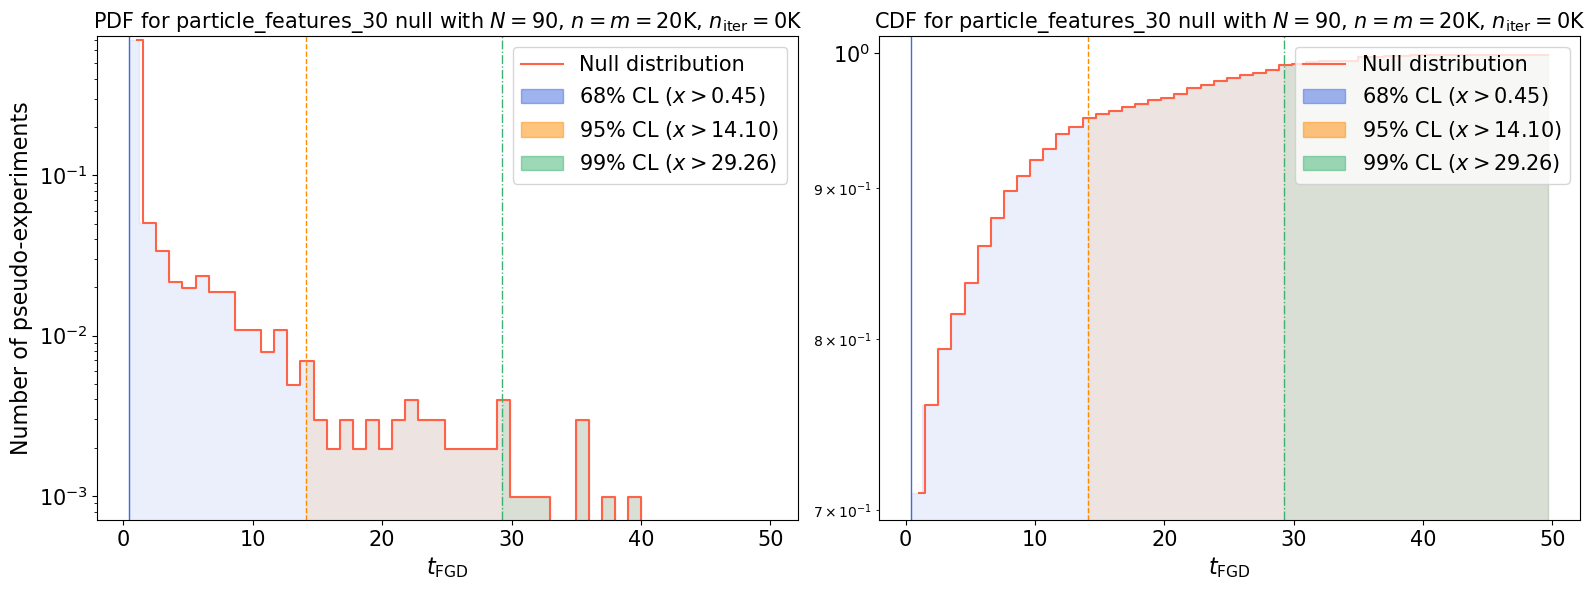

Time elapsed: 0.6140587890986353 seconds.
mu = 172079482.35933936 +/- 3.760845884869599e+18
sigma = 10905429347.37524 +/- 541869690.9003949
68%CL = 560764596.0126953, 95%CL = 23636964354.731445, 99%CL = 44119727854.39746
mu = 172079482.35933936 +/- 3.760845884869599e+18
sigma = 10905429347.37524 +/- 541869690.9003949


/tmp/ipykernel_2863069/2316451616.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2863069/2316451616.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2863069/2316451616.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2863069/2316451616.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


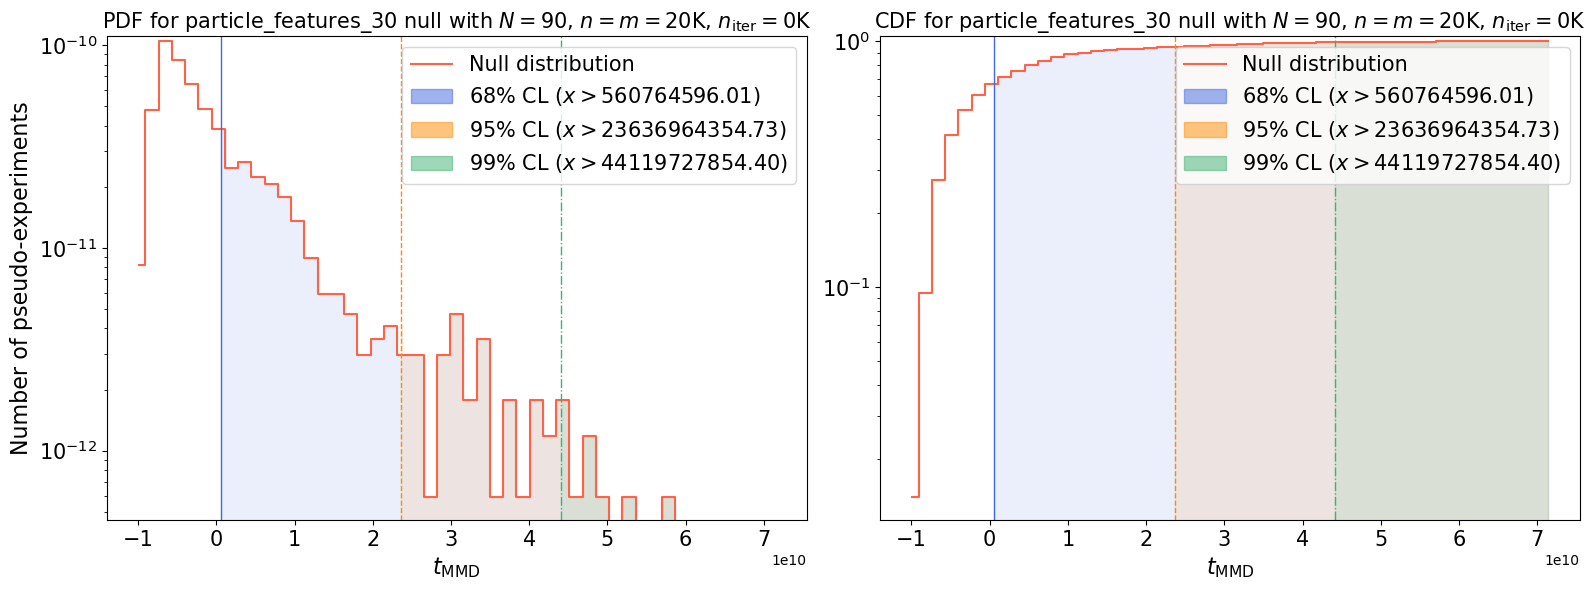

Time elapsed: 0.8684225738979876 seconds.
mu = 0.864218190178896 +/- 0.00030038651497468847
sigma = 0.09746309895136167 +/- 0.002521487760393997
68%CL = 0.9026117208931181, 95%CL = 1.0436674041880503, 99%CL = 1.1533337334791818
mu = 0.864218190178896 +/- 0.00030038651497468847
sigma = 0.09746309895136167 +/- 0.002521487760393997


/tmp/ipykernel_2863069/2316451616.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2863069/2316451616.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2863069/2316451616.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2863069/2316451616.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


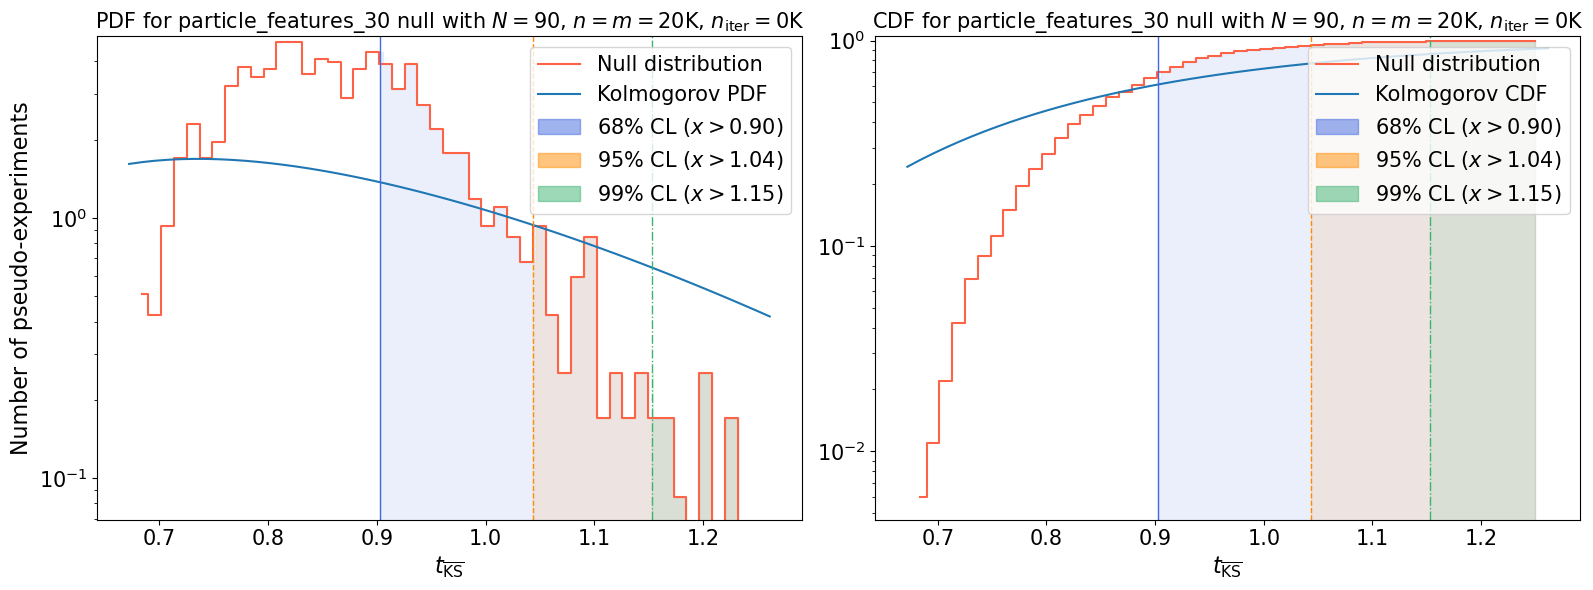

Time elapsed: 0.693895410047844 seconds.
mu = 0.8600483770482242 +/- 0.0006332002999230701
sigma = 0.1415045993195501 +/- 0.004762824239575719
68%CL = 0.8942003361880779, 95%CL = 1.1402010917663574, 99%CL = 1.3346505351364613
mu = 0.8600483770482242 +/- 0.0006332002999230701
sigma = 0.1415045993195501 +/- 0.004762824239575719


/tmp/ipykernel_2863069/2316451616.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2863069/2316451616.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2863069/2316451616.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2863069/2316451616.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


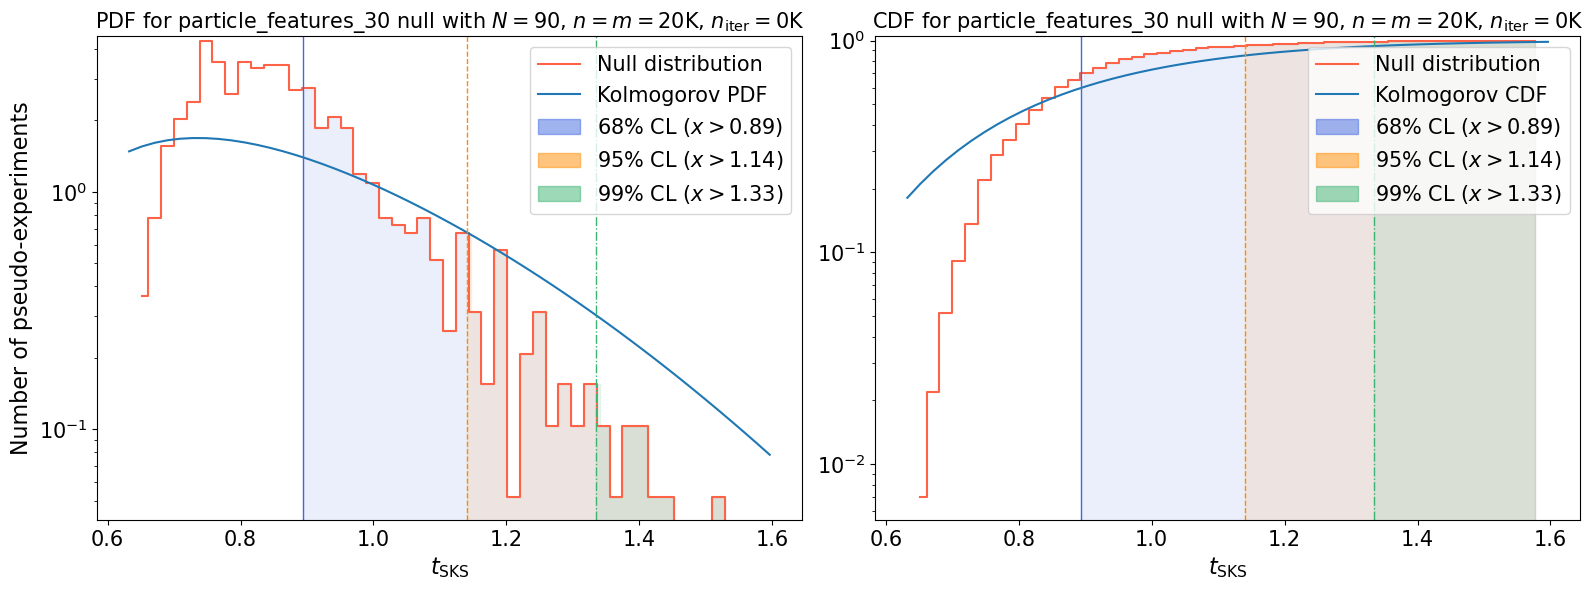

Time elapsed: 0.6982209470588714 seconds.
mu = 1.8493566142424966 +/- 0.006983928962529012
sigma = 0.4699481092462062 +/- 0.019320736856606496
68%CL = 1.9255338374559303, 95%CL = 2.726426769584323, 99%CL = 3.402446569660933
mu = 1.8493566142424966 +/- 0.006983928962529012
sigma = 0.4699481092462062 +/- 0.019320736856606496


/tmp/ipykernel_2863069/2316451616.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_2863069/2316451616.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_2863069/2316451616.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_2863069/2316451616.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


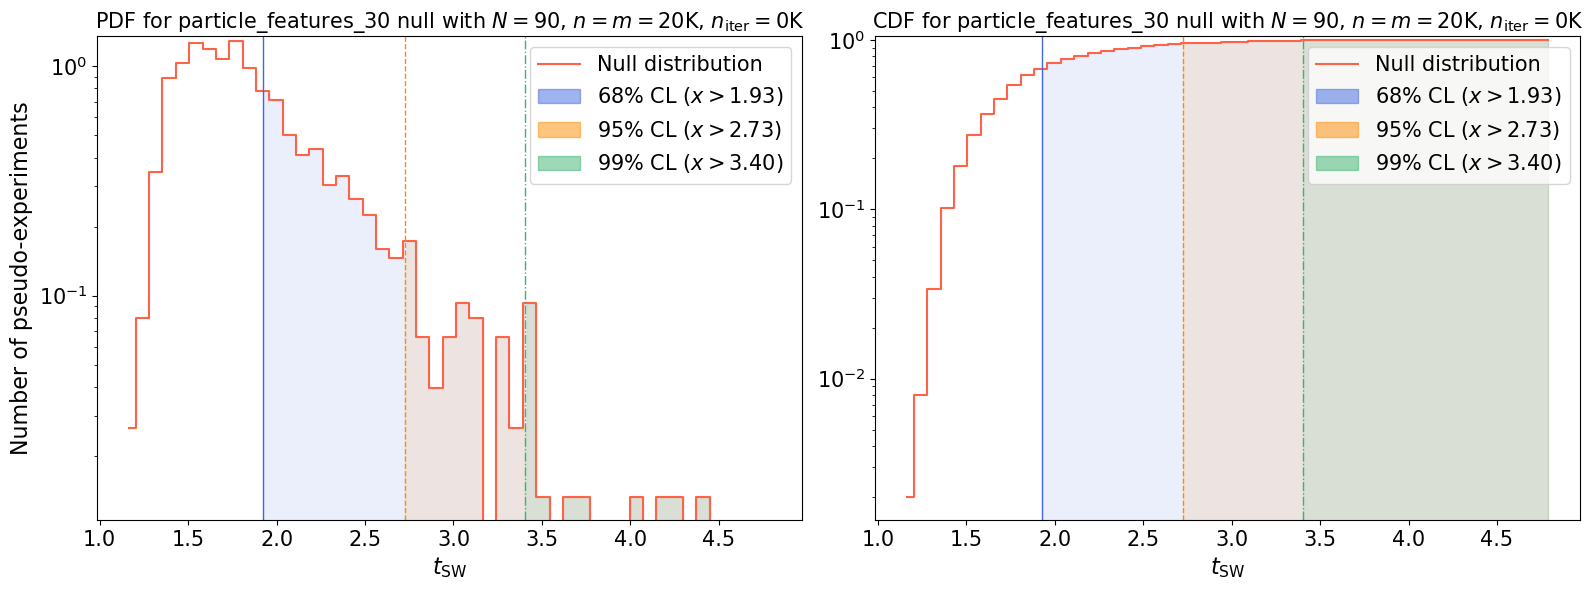

Time elapsed: 0.5463662929832935 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fgd,FGDMetricNull,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7fa174fca560>,"lambda ns, ndims: 1","{'niter': 4, 'batch_size_test': 20000, 'batch_...",360,$t_{\mathrm{FGD}}$,results/particle_features_30/tests/20K/null_hy...,"[[0.68, [680, 319], 0.4474645788726467], [0.95...",results/particle_features_30/tests/20K/null_hy...
1,mmd,MMDMetricNull,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 10000, 'normalise'...",metric_list,<function <lambda> at 0x7fa174fcb5b0>,"lambda ns, ndims: 1","{'niter': 4, 'batch_size_test': 20000, 'batch_...",360,$t_{\mathrm{MMD}}$,results/particle_features_30/tests/20K/null_hy...,"[[0.68, [680, 319], 560764596.0126953], [0.95,...",results/particle_features_30/tests/20K/null_hy...
2,ks,KSTestNull,GMetrics.KSTest,{'verbose': True},statistic_means,<function <lambda> at 0x7fa174fcb640>,"lambda ns, _: np.sqrt(ns)","{'niter': 4, 'batch_size_test': 20000, 'batch_...",720,$t_{\overline{\mathrm{KS}}}$,results/particle_features_30/tests/20K/null_hy...,"[[0.68, [680, 319], 0.9026117208931181], [0.95...",results/particle_features_30/tests/20K/null_hy...
3,sks,SKSTestNull,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7fa174fcb6d0>,"lambda ns, _: np.sqrt(ns)","{'niter': 4, 'batch_size_test': 20000, 'batch_...",400,$t_{\mathrm{SKS}}$,results/particle_features_30/tests/20K/null_hy...,"[[0.68, [680, 319], 0.8942003361880779], [0.95...",results/particle_features_30/tests/20K/null_hy...
4,swd,SWDMetricNull,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7fa174fcb760>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 4, 'batch_size_test': 20000, 'batch_...",400,$t_{\mathrm{SW}}$,results/particle_features_30/tests/20K/null_hy...,"[[0.68, [680, 319], 1.9255338374559303], [0.95...",results/particle_features_30/tests/20K/null_hy...


In [15]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for particle_features_30 null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for particle_features_30 null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypothesis

### Scan and exclusion limits (bisection method)

In [16]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter_null": niter,
               "niter_alt": 100, # this will be adapted to the boostrap size
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}

In [17]:
file_path = os.path.join(model_dir, "exclusion_limits.json")
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}
    
# Sort the dictionary by keys
existing_data = dict(sorted(existing_data.items()))

# Save the sorted dictionary back to a JSON file
with open(file_path, 'w') as f:
    json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

In [18]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
bounds = ["upper", "central", "lower"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values()):
    for deformation in deformations:
        eps_max = 2.
        for bound in bounds:
            try:
                result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation and v["bound"] == bound}.items() if v["exclusion_list"] != []}
            except:
                result = {}
            if result == {}:
                print(f"Computing {bound} bounds for {metric_config['name']} with {deformation} deformation.")
                result = compute_exclusion_bisection_dataset(dataset = dataset,
                                                             metric_config = metric_config,
                                                             test_kwargs = test_kwargs,
                                                             model_dir = model_dir,
                                                             deformation = deformation,
                                                             seed_dist = 0,
                                                             x_tol = 0.1,
                                                             fn_tol = 0.15,
                                                             bound = bound,
                                                             eps_min = 0.,
                                                             eps_max = eps_max,
                                                             smear = 0.,
                                                             max_iterations = 100,
                                                             save = True,
                                                             filename = "exclusion_limits.json",
                                                             verbose = True)
                eps_max = list(result.values())[0]["exclusion_list"][-1][3]
            else:
                print(f"{bound.capitalize()} bounds for {metric_config['name']} with {deformation} deformation already loaded.")
            global_results.update(result)
print(global_results.keys())

Upper bounds for fgd with mean deformation already loaded.
Central bounds for fgd with mean deformation already loaded.
Lower bounds for fgd with mean deformation already loaded.
Upper bounds for fgd with cov_diag deformation already loaded.
Central bounds for fgd with cov_diag deformation already loaded.
Lower bounds for fgd with cov_diag deformation already loaded.
Upper bounds for fgd with cov_off_diag deformation already loaded.
Central bounds for fgd with cov_off_diag deformation already loaded.
Lower bounds for fgd with cov_off_diag deformation already loaded.
Upper bounds for fgd with power_abs_up deformation already loaded.
Central bounds for fgd with power_abs_up deformation already loaded.
Lower bounds for fgd with power_abs_up deformation already loaded.
Upper bounds for fgd with power_abs_down deformation already loaded.
Central bounds for fgd with power_abs_down deformation already loaded.
Lower bounds for fgd with power_abs_down deformation already loaded.
Upper bounds fo

## Show and save results

In [19]:
import notebooks.shared as shared

In [20]:
results_df, times_df = shared.generate_result_dataframe(global_results, null_times)

Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
M

In [21]:
results_df_mean, results_df_cov_diag, results_df_cov_off_diag, results_df_power_abs_up, results_df_power_abs_down, results_df_random_normal, results_df_random_uniform = shared.get_individual_dfs(results_df, show = True)

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm {CL}}$,$t^{\mu}$ (s)
30,swd,$0.03755_{-0.018}^{+0.019}$,$0.06003_{-0.019}^{+0.017}$,$1152$
9,ks,$0.00993_{-0.0078}^{+0.0052}$,$0.01668_{-0.0032}^{+0.0052}$,$1777$
23,sks,$0.02531_{-0.01}^{+0.0089}$,$0.03801_{-0.0072}^{+0.0058}$,$3266$
2,fgd,$0.07038_{-0.031}^{+0.025}$,$0.10569_{-0.021}^{+0.016}$,$5425$
16,mmd,$0.21075_{-0.096}^{+0.19}$,$0.31926_{-0.11}^{+0.12}$,$3912$


,Statistic,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s)
28,swd,$0.04347_{-0.019}^{+0.017}$,$0.06373_{-0.016}^{+0.016}$,$1126$
7,ks,$0.02465_{-0.019}^{+0.016}$,$0.03767_{-0.0092}^{+0.017}$,$2402$
21,sks,$0.04334_{-0.017}^{+0.0094}$,$0.05753_{-0.014}^{+0.0085}$,$3575$
0,fgd,$0.06198_{-0.024}^{+0.033}$,$0.08926_{-0.024}^{+0.024}$,$5291$
14,mmd,$0.11714_{-0.054}^{+0.072}$,$0.15051_{-0.057}^{+0.064}$,$4844$


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
29,swd,$0.07169_{-0.028}^{+0.026}$,$0.11253_{-0.021}^{+0.019}$,$2519$
8,ks,$1.03785_{-0.024}^{+0.009}$,$1.04608_{-0.016}^{+0.0082}$,$3547$
22,sks,$0.06763_{-0.026}^{+0.03}$,$0.09915_{-0.025}^{+0.025}$,$8887$
1,fgd,$0.04432_{-0.013}^{+0.01}$,$0.06957_{-0.012}^{+0.011}$,$9665$
15,mmd,$0.41314_{-0.12}^{+0.1}$,$0.59522_{-0.13}^{+0.083}$,$33606$


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm {pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
32,swd,$0.04032_{-0.017}^{+0.016}$,$0.05911_{-0.017}^{+0.015}$,$1172$
11,ks,$0.01587_{-0.013}^{+0.0085}$,$0.02425_{-0.0046}^{+0.011}$,$3776$
25,sks,$0.05979_{-0.024}^{+0.03}$,$0.08436_{-0.021}^{+0.032}$,$4543$
4,fgd,$0.03326_{-0.014}^{+0.03}$,$0.04854_{-0.012}^{+0.028}$,$5966$
18,mmd,$0.03172_{-0.016}^{+1.9}$,$0.03834_{-0.01}^{+1.9}$,$5648$


,Statistic,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^ {\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
31,swd,$0.04099_{-0.02}^{+0.02}$,$0.05783_{-0.013}^{+0.022}$,$1141$
10,ks,$0.01675_{-0.013}^{+0.0096}$,$0.0256_{-0.0076}^{+0.011}$,$4437$
24,sks,$0.05825_{-0.028}^{+0.024}$,$0.07685_{-0.022}^{+0.024}$,$5427$
3,fgd,$0.03691_{-0.019}^{+0.028}$,$0.05501_{-0.017}^{+0.026}$,$5290$
17,mmd,$0.03173_{-0.015}^{+0.029}$,$0.04728_{-0.018}^{+0.023}$,$6602$


,Statistic,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^ {\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
33,swd,$0.1312_{-0.036}^{+0.033}$,$0.17415_{-0.035}^{+0.026}$,$960$
12,ks,$0.09466_{-0.023}^{+0.019}$,$0.10855_{-0.021}^{+0.023}$,$3808$
26,sks,$0.10894_{-0.02}^{+0.012}$,$0.13563_{-0.017}^{+0.0038}$,$5278$
5,fgd,$0.1818_{-0.037}^{+0.04}$,$0.22626_{-0.036}^{+0.027}$,$4748$
19,mmd,$0.38994_{-0.071}^{+0.15}$,$0.49845_{-0.12}^{+0.096}$,$6103$


,Statistic,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^ {\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
34,swd,$0.2237_{-0.029}^{+0.05}$,$0.29694_{-0.038}^{+0.044}$,$876$
13,ks,$0.1547_{-0.043}^{+0.025}$,$0.19254_{-0.046}^{+0.023}$,$4086$
27,sks,$0.19209_{-0.044}^{+0.019}$,$0.22571_{-0.0097}^{+0.02}$,$5294$
6,fgd,$0.31601_{-0.064}^{+0.067}$,$0.3933_{-0.062}^{+0.046}$,$4219$
20,mmd,$0.73168_{-0.19}^{+0.25}$,$0.85127_{-0.21}^{+0.23}$,$6154$


In [22]:
sorted_df_mean, sorted_df_cov_diag, sorted_df_cov_off_diag, sorted_df_power_abs_up, sorted_df_power_abs_down, sorted_df_random_normal, sorted_df_random_uniform = shared.get_sorted_dfs(results_df, show = True)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm {CL}}$,$t^{\mu}$ (s),95%CL,99%CL,time
9,ks,mean,90,4,20000,$0.00993_{-0.0078}^{+0.0052}$,$0.01668_{-0.0032}^{+0.0052}$,$1777$,"[0.00215, 0.00993, 0.01514]","[0.0135, 0.01668, 0.02192]","[803.4437928269617, 394.3023344660178, 580.199..."
23,sks,mean,90,4,20000,$0.02531_{-0.01}^{+0.0089}$,$0.03801_{-0.0072}^{+0.0058}$,$3266$,"[0.01485, 0.02531, 0.03418]","[0.03077, 0.03801, 0.04378]","[1624.003775103949, 801.8841464230791, 841.077..."
30,swd,mean,90,4,20000,$0.03755_{-0.018}^{+0.019}$,$0.06003_{-0.019}^{+0.017}$,$1152$,"[0.0197, 0.03755, 0.05664]","[0.04112, 0.06003, 0.07752]","[573.2459770413116, 274.0542824729346, 305.112..."
2,fgd,mean,90,4,20000,$0.07038_{-0.031}^{+0.025}$,$0.10569_{-0.021}^{+0.016}$,$5425$,"[0.03953, 0.07038, 0.0957]","[0.08501, 0.10569, 0.12174]","[2437.909976397641, 1222.0772026316263, 1765.6..."
16,mmd,mean,90,4,20000,$0.21075_{-0.096}^{+0.19}$,$0.31926_{-0.11}^{+0.12}$,$3912$,"[0.11473, 0.21075, 0.39844]","[0.2106, 0.31926, 0.44223]","[1541.6416245060973, 1213.536363326013, 1156.9..."


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm {CL}}$,$t^{\mu}$ (s)
9,ks,$0.00993_{-0.0078}^{+0.0052}$,$0.01668_{-0.0032}^{+0.0052}$,$1777$
23,sks,$0.02531_{-0.01}^{+0.0089}$,$0.03801_{-0.0072}^{+0.0058}$,$3266$
30,swd,$0.03755_{-0.018}^{+0.019}$,$0.06003_{-0.019}^{+0.017}$,$1152$
2,fgd,$0.07038_{-0.031}^{+0.025}$,$0.10569_{-0.021}^{+0.016}$,$5425$
16,mmd,$0.21075_{-0.096}^{+0.19}$,$0.31926_{-0.11}^{+0.12}$,$3912$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s),95%CL,99%CL,time
7,ks,cov_diag,90,4,20000,$0.02465_{-0.019}^{+0.016}$,$0.03767_{-0.0092}^{+0.017}$,$2402$,"[0.00515, 0.02465, 0.04102]","[0.02852, 0.03767, 0.05441]","[1062.962914668955, 560.4074137848802, 778.999..."
21,sks,cov_diag,90,4,20000,$0.04334_{-0.017}^{+0.0094}$,$0.05753_{-0.014}^{+0.0085}$,$3575$,"[0.02607, 0.04334, 0.05273]","[0.04377, 0.05753, 0.06605]","[1886.1493768850341, 726.4579658573493, 963.12..."
28,swd,cov_diag,90,4,20000,$0.04347_{-0.019}^{+0.017}$,$0.06373_{-0.016}^{+0.016}$,$1126$,"[0.02489, 0.04347, 0.06055]","[0.04795, 0.06373, 0.07949]","[544.3822150481865, 273.107213512063, 308.9927..."
0,fgd,cov_diag,90,4,20000,$0.06198_{-0.024}^{+0.033}$,$0.08926_{-0.024}^{+0.024}$,$5291$,"[0.03766, 0.06198, 0.09473]","[0.06507, 0.08926, 0.11333]","[2585.982586453203, 1353.2554096523672, 1352.2..."
14,mmd,cov_diag,90,4,20000,$0.11714_{-0.054}^{+0.072}$,$0.15051_{-0.057}^{+0.064}$,$4844$,"[0.0635, 0.11714, 0.18945]","[0.09341, 0.15051, 0.21421]","[2218.5944063849747, 1289.9444505628198, 1336...."


,Statistic,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s)
7,ks,$0.02465_{-0.019}^{+0.016}$,$0.03767_{-0.0092}^{+0.017}$,$2402$
21,sks,$0.04334_{-0.017}^{+0.0094}$,$0.05753_{-0.014}^{+0.0085}$,$3575$
28,swd,$0.04347_{-0.019}^{+0.017}$,$0.06373_{-0.016}^{+0.016}$,$1126$
0,fgd,$0.06198_{-0.024}^{+0.033}$,$0.08926_{-0.024}^{+0.024}$,$5291$
14,mmd,$0.11714_{-0.054}^{+0.072}$,$0.15051_{-0.057}^{+0.064}$,$4844$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s),95%CL,99%CL,time
1,fgd,cov_off_diag,90,4,20000,$0.04432_{-0.013}^{+0.01}$,$0.06957_{-0.012}^{+0.011}$,$9665$,"[0.03152, 0.04432, 0.05444]","[0.05768, 0.06957, 0.08104]","[4109.753400631016, 2229.6404448100366, 3326.3..."
22,sks,cov_off_diag,90,4,20000,$0.06763_{-0.026}^{+0.03}$,$0.09915_{-0.025}^{+0.025}$,$8887$,"[0.04183, 0.06763, 0.09766]","[0.07407, 0.09915, 0.12366]","[4757.386861419072, 2142.6621187957935, 1987.3..."
29,swd,cov_off_diag,90,4,20000,$0.07169_{-0.028}^{+0.026}$,$0.11253_{-0.021}^{+0.019}$,$2519$,"[0.04396, 0.07169, 0.09766]","[0.0911, 0.11253, 0.1311]","[1249.2583171448205, 631.9507037489675, 638.03..."
15,mmd,cov_off_diag,90,4,20000,$0.41314_{-0.12}^{+0.1}$,$0.59522_{-0.13}^{+0.083}$,$33606$,"[0.28831, 0.41314, 0.51562]","[0.46094, 0.59522, 0.67798]","[13337.784806018928, 10152.801028703107, 10115..."
8,ks,cov_off_diag,90,4,20000,$1.03785_{-0.024}^{+0.009}$,$1.04608_{-0.016}^{+0.0082}$,$3547$,"[1.01339, 1.03785, 1.04688]","[1.02974, 1.04608, 1.05432]","[1881.690841614036, 894.7138573350385, 770.702..."


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
1,fgd,$0.04432_{-0.013}^{+0.01}$,$0.06957_{-0.012}^{+0.011}$,$9665$
22,sks,$0.06763_{-0.026}^{+0.03}$,$0.09915_{-0.025}^{+0.025}$,$8887$
29,swd,$0.07169_{-0.028}^{+0.026}$,$0.11253_{-0.021}^{+0.019}$,$2519$
15,mmd,$0.41314_{-0.12}^{+0.1}$,$0.59522_{-0.13}^{+0.083}$,$33606$
8,ks,$1.03785_{-0.024}^{+0.009}$,$1.04608_{-0.016}^{+0.0082}$,$3547$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm {pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s),95%CL,99%CL,time
11,ks,power_abs_up,90,4,20000,$0.01587_{-0.013}^{+0.0085}$,$0.02425_{-0.0046}^{+0.011}$,$3776$,"[0.00313, 0.01587, 0.02441]","[0.01963, 0.02425, 0.03503]","[1816.152191487141, 824.1134066618979, 1135.77..."
18,mmd,power_abs_up,90,4,20000,$0.03172_{-0.016}^{+1.9}$,$0.03834_{-0.01}^{+1.9}$,$5648$,"[0.01618, 0.03172, 1.9375]","[0.02795, 0.03834, 1.96875]","[752.5812863251194, 3273.3157951147296, 1622.3..."
4,fgd,power_abs_up,90,4,20000,$0.03326_{-0.014}^{+0.03}$,$0.04854_{-0.012}^{+0.028}$,$5966$,"[0.01896, 0.03326, 0.06348]","[0.03652, 0.04854, 0.07671]","[2713.722998958081, 1897.770455576945, 1355.40..."
32,swd,power_abs_up,90,4,20000,$0.04032_{-0.017}^{+0.016}$,$0.05911_{-0.017}^{+0.015}$,$1172$,"[0.02309, 0.04032, 0.05664]","[0.04222, 0.05911, 0.07372]","[587.0939182001166, 276.95876260008663, 308.06..."
25,sks,power_abs_up,90,4,20000,$0.05979_{-0.024}^{+0.03}$,$0.08436_{-0.021}^{+0.032}$,$4543$,"[0.03559, 0.05979, 0.08984]","[0.06303, 0.08436, 0.11596]","[2147.550907632336, 1182.3740408951417, 1213.4..."


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm {pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
11,ks,$0.01587_{-0.013}^{+0.0085}$,$0.02425_{-0.0046}^{+0.011}$,$3776$
18,mmd,$0.03172_{-0.016}^{+1.9}$,$0.03834_{-0.01}^{+1.9}$,$5648$
4,fgd,$0.03326_{-0.014}^{+0.03}$,$0.04854_{-0.012}^{+0.028}$,$5966$
32,swd,$0.04032_{-0.017}^{+0.016}$,$0.05911_{-0.017}^{+0.015}$,$1172$
25,sks,$0.05979_{-0.024}^{+0.03}$,$0.08436_{-0.021}^{+0.032}$,$4543$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^ {\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s),95%CL,99%CL,time
10,ks,power_abs_down,90,4,20000,$0.01675_{-0.013}^{+0.0096}$,$0.0256_{-0.0076}^{+0.011}$,$4437$,"[0.0035, 0.01675, 0.02637]","[0.018, 0.0256, 0.03697]","[2139.0581448921002, 970.4691575770266, 1327.7..."
17,mmd,power_abs_down,90,4,20000,$0.03173_{-0.015}^{+0.029}$,$0.04728_{-0.018}^{+0.023}$,$6602$,"[0.01699, 0.03173, 0.06055]","[0.0293, 0.04728, 0.07002]","[3191.3511939230375, 1689.1878929627128, 1722...."
3,fgd,power_abs_down,90,4,20000,$0.03691_{-0.019}^{+0.028}$,$0.05501_{-0.017}^{+0.026}$,$5290$,"[0.01805, 0.03691, 0.06445]","[0.03769, 0.05501, 0.08146]","[2569.392671340145, 1359.235741052311, 1361.99..."
31,swd,power_abs_down,90,4,20000,$0.04099_{-0.02}^{+0.02}$,$0.05783_{-0.013}^{+0.022}$,$1141$,"[0.02078, 0.04099, 0.06055]","[0.04509, 0.05783, 0.07949]","[556.052715301048, 278.1883530509658, 307.5164..."
24,sks,power_abs_down,90,4,20000,$0.05825_{-0.028}^{+0.024}$,$0.07685_{-0.022}^{+0.024}$,$5427$,"[0.03002, 0.05825, 0.08203]","[0.0549, 0.07685, 0.10076]","[2358.9578453311697, 1436.1134558543563, 1632...."


,Statistic,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^ {\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
10,ks,$0.01675_{-0.013}^{+0.0096}$,$0.0256_{-0.0076}^{+0.011}$,$4437$
17,mmd,$0.03173_{-0.015}^{+0.029}$,$0.04728_{-0.018}^{+0.023}$,$6602$
3,fgd,$0.03691_{-0.019}^{+0.028}$,$0.05501_{-0.017}^{+0.026}$,$5290$
31,swd,$0.04099_{-0.02}^{+0.02}$,$0.05783_{-0.013}^{+0.022}$,$1141$
24,sks,$0.05825_{-0.028}^{+0.024}$,$0.07685_{-0.022}^{+0.024}$,$5427$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^ {\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s),95%CL,99%CL,time
12,ks,random_normal,90,4,20000,$0.09466_{-0.023}^{+0.019}$,$0.10855_{-0.021}^{+0.023}$,$3808$,"[0.07124, 0.09466, 0.11328]","[0.08756, 0.10855, 0.13171]","[1961.4583122720942, 858.753983383067, 988.683..."
26,sks,random_normal,90,4,20000,$0.10894_{-0.02}^{+0.012}$,$0.13563_{-0.017}^{+0.0038}$,$5278$,"[0.08901, 0.10894, 0.12109]","[0.11815, 0.13563, 0.13944]","[2858.069198139943, 1212.81757896021, 1207.961..."
33,swd,random_normal,90,4,20000,$0.1312_{-0.036}^{+0.033}$,$0.17415_{-0.035}^{+0.026}$,$960$,"[0.09524, 0.1312, 0.16406]","[0.13963, 0.17415, 0.19992]","[464.18661782192066, 217.4497427586466, 279.12..."
5,fgd,random_normal,90,4,20000,$0.1818_{-0.037}^{+0.04}$,$0.22626_{-0.036}^{+0.027}$,$4748$,"[0.14495, 0.1818, 0.22168]","[0.19069, 0.22626, 0.25294]","[2580.852226026822, 949.4678485183977, 1218.46..."
19,mmd,random_normal,90,4,20000,$0.38994_{-0.071}^{+0.15}$,$0.49845_{-0.12}^{+0.096}$,$6103$,"[0.31932, 0.38994, 0.54297]","[0.3753, 0.49845, 0.59419]","[2816.9888205770403, 1626.6164341089316, 1659...."


,Statistic,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^ {\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
12,ks,$0.09466_{-0.023}^{+0.019}$,$0.10855_{-0.021}^{+0.023}$,$3808$
26,sks,$0.10894_{-0.02}^{+0.012}$,$0.13563_{-0.017}^{+0.0038}$,$5278$
33,swd,$0.1312_{-0.036}^{+0.033}$,$0.17415_{-0.035}^{+0.026}$,$960$
5,fgd,$0.1818_{-0.037}^{+0.04}$,$0.22626_{-0.036}^{+0.027}$,$4748$
19,mmd,$0.38994_{-0.071}^{+0.15}$,$0.49845_{-0.12}^{+0.096}$,$6103$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^ {\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s),95%CL,99%CL,time
13,ks,random_uniform,90,4,20000,$0.1547_{-0.043}^{+0.025}$,$0.19254_{-0.046}^{+0.023}$,$4086$,"[0.11131, 0.1547, 0.17969]","[0.14685, 0.19254, 0.21524]","[1936.4291484188288, 930.0553990048356, 1219.6..."
27,sks,random_uniform,90,4,20000,$0.19209_{-0.044}^{+0.019}$,$0.22571_{-0.0097}^{+0.02}$,$5294$,"[0.14812, 0.19209, 0.21094]","[0.21601, 0.22571, 0.24588]","[2709.2550964029506, 1284.6280754897743, 1300...."
34,swd,random_uniform,90,4,20000,$0.2237_{-0.029}^{+0.05}$,$0.29694_{-0.038}^{+0.044}$,$876$,"[0.19487, 0.2237, 0.27344]","[0.25866, 0.29694, 0.34088]","[437.2148225228302, 217.93263411801308, 221.12..."
6,fgd,random_uniform,90,4,20000,$0.31601_{-0.064}^{+0.067}$,$0.3933_{-0.062}^{+0.046}$,$4219$,"[0.25196, 0.31601, 0.38281]","[0.33146, 0.3933, 0.43967]","[2039.012615218293, 953.8489233162254, 1226.98..."
20,mmd,random_uniform,90,4,20000,$0.73168_{-0.19}^{+0.25}$,$0.85127_{-0.21}^{+0.23}$,$6154$,"[0.54535, 0.73168, 0.98438]","[0.64095, 0.85127, 1.07959]","[2058.2996666780673, 2454.7885376499034, 1641...."


,Statistic,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^ {\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
13,ks,$0.1547_{-0.043}^{+0.025}$,$0.19254_{-0.046}^{+0.023}$,$4086$
27,sks,$0.19209_{-0.044}^{+0.019}$,$0.22571_{-0.0097}^{+0.02}$,$5294$
34,swd,$0.2237_{-0.029}^{+0.05}$,$0.29694_{-0.038}^{+0.044}$,$876$
6,fgd,$0.31601_{-0.064}^{+0.067}$,$0.3933_{-0.062}^{+0.046}$,$4219$
20,mmd,$0.73168_{-0.19}^{+0.25}$,$0.85127_{-0.21}^{+0.23}$,$6154$


### Latex

In [23]:
#tex_string = shared.generate_result_latex_wide(results_df, times_df, nstring = "10^{4}")
tex_string = shared.generate_result_latex(results_df, times_df, title = "{\\bf Particle features with $\\mathbf{n=m=2\\cdot 10^{4}}$}")
print(tex_string)

\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf Particle features with $\mathbf{n=m=2\cdot 10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm    {CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{SW}}$ & $0.03755_{-0.018}^{+0.019}$ & $0.06003_{-0.019}^{+0.017}$ & ${\mathbf{1152}}$ & $0.04347_{-0.019}^{+0.017}$ & $0.06373_{-0.016}^{+0.016}$ & ${\mathbf{1126}}$ \\
	$t_{\overline{\mathrm{KS}}}$ & ${\mathbf{0.00993_{-0.0078}^{+0.0052}}}$ & ${\mathbf{0.01668_{-0.0032}^{+0.0052}}}$ & $1777$ & ${\mathbf{0.02465_{-0.019}^{+0.016}}}$ & ${\mathbf{0.03767_{-0.0092}^{+0.017}}}$ & $2402$ \\
	$t_{\mathrm{SKS}}$ & $0.02531_{-0.01}^{+0.0089}$ & $0.03801_{-0.0072}^{+0.0058}$ & $3266$ & $0.04334_{-0.017}^{+0.0094}$ & $0.05753_{-0.014}^{+0.0085}$ & $3575$ \\
	$t_{\mathrm{FGD}}$

In [24]:
shared.save_latex(tex_string, model_dir)

LaTeX table code has been written to results/particle_features_30/tests/20K/results_table.tex
